In [2]:
import numpy                 as np
import matplotlib.pyplot     as plt
import matplotlib.gridspec   as gridspec
import cartopy.crs           as ccrs
import cartopy.feature       as cfeature
from matplotlib              import dates as mdates
from datetime                import datetime, timedelta
import xarray                as xr
import cmocean
import scipy.io
import netCDF4               as netcdf
import glob

In [3]:
lonmin, lonmax, latmin, latmax = 1, 5, 38.5, 41 # Balearic Sea

SWATHS OF SWOT

In [4]:
#dir_swaths = 'C:/Users/Usuario/OneDrive - Universitat de les Illes Balears/SWOT/OSSEs/swath_swot/'
dir_swaths = '/home/everger/ONEDRIVE/SWOT/OSSEs/swath_swot/'

file_swaths1 = 'MED_fastPhase_1km_swotFAST_grid_p009.nc'
file_swaths2 = 'MED_fastPhase_1km_swotFAST_grid_p022.nc'

In [5]:
nc    = netcdf.Dataset(dir_swaths + file_swaths1, 'r')
latsw1  = nc.variables['lat'][:]   
lonsw1  = nc.variables['lon'][:]  
x_ac1   = nc.variables['x_ac'][:]  # "Across track distance from nadir"

lonnd1  = nc.variables['lon_nadir'][:] 
latnd1  = nc.variables['lat_nadir'][:] 
nc.close()     

nc    = netcdf.Dataset(dir_swaths + file_swaths2, 'r')
latsw2  = nc.variables['lat'][:]   
lonsw2  = nc.variables['lon'][:]  
x_ac2   = nc.variables['x_ac'][:]  # "Across track distance from nadir"

lonnd2  = nc.variables['lon_nadir'][:] 
latnd2  = nc.variables['lat_nadir'][:]     

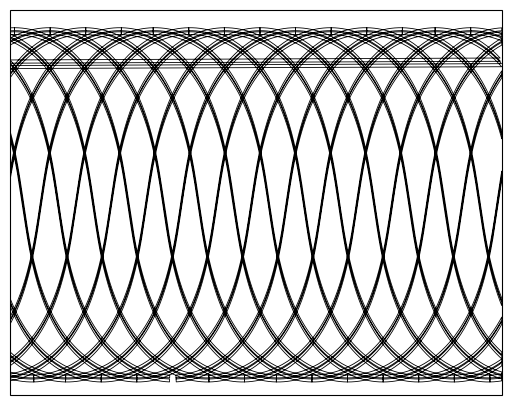

In [47]:
# SWOT swaths
import scipy.io as sio

mat = sio.loadmat('../../SWOT/OSSEs/SWOT_Orbit/SWOT_Orbit/swot_calval_orbit_jun22015-v2-swath.mat')
swath = mat['lonlat_swot_track_swath']

fig = plt.figure(figsize=(7,5))

gs  = gridspec.GridSpec(1, 1)
ax  = plt.subplot(gs[0,0], projection=ccrs.Mercator())

c ="k"
plt.plot(swath[:,0], swath[:,1], c=c,transform=ccrs.PlateCarree(),linewidth=0.6)

Bathymetry


In [6]:
#dir_topo    = 'C:/Users/Usuario/OneDrive - Universitat de les Illes Balears/SWOT/OSSEs/topography/'
dir_topo    = '/home/everger/ONEDRIVE/SWOT/OSSEs/topography/'

file_topo   = 'usgsCeSrtm30v6_8303_496d_dd25.nc'

In [7]:
nc        = netcdf.Dataset(dir_topo + file_topo, 'r')
lat_topo  = nc.variables['latitude'][:] 
lon_topo  = nc.variables['longitude'][:] 
topo      = nc.variables['topo'][:] # [m]  
nc.close()

# Limit region

ilont_dom = np.where(np.logical_and(lon_topo>=lonmin-1, lon_topo<=lonmax+1))
jlatt_dom = np.where(np.logical_and(lat_topo>=latmin-1, lat_topo<=latmax+1))

lon_topo_dom = lon_topo[ilont_dom]
lat_topo_dom = lat_topo[jlatt_dom][::-1] # increasing!!
topo_dom     = topo[jlatt_dom,:].squeeze()[:, ilont_dom].squeeze()[::-1, :] #lat axis in increasing order

lon_topo2d, lat_topo2d = np.meshgrid(lon_topo_dom, lat_topo_dom)

### SHIP TRAJECTORY


LEG 1

In [8]:
url_root = "http://thredds.socib.es/thredds/dodsC/research_vessel/"

url_vars = "trajectory,time[0:1:10597],LAT[0:1:10597],QC_LAT[0:1:10597],LON[0:1:10597],QC_LON[0:1:10597],DEPTH,PLAT_COUR[0:1:10597],QC_PLAT_COUR[0:1:10597],PLAT_SPEED[0:1:10597],QC_PLAT_SPEED[0:1:10597],SEA_FLOOR_DEPTH[0:1:10597],QC_SEA_FLOOR_DEPTH[0:1:10597]"

# http://thredds.socib.es/thredds/dodsC/research_vessel/gps/socib_rv-scb_pos001/L1/2023/05/dep0109_socib-rv_scb-pos001_L1_2023-05-07.nc?trajectory,time[0:1:8220],LAT[0:1:8220],QC_LAT[0:1:8220],LON[0:1:8220],QC_LON[0:1:8220],PLAT_COUR[0:1:8220],QC_PLAT_COUR[0:1:8220],PLAT_SPEED[0:1:8220],QC_PLAT_SPEED[0:1:8220],SEA_FLOOR_DEPTH[0:1:8220],QC_SEA_FLOOR_DEPTH[0:1:8220]
#http://thredds.socib.es/thredds/dodsC/research_vessel/gps/socib_rv-scb_pos001/L1/2023/04/dep0106_socib-rv_scb-pos001_L1_2023-04-25.nc?trajectory,time[0:1:10597],LAT[0:1:10597],QC_LAT[0:1:10597],LON[0:1:10597],QC_LON[0:1:10597],DEPTH,PLAT_COUR[0:1:10597],QC_PLAT_COUR[0:1:10597],PLAT_SPEED[0:1:10597],QC_PLAT_SPEED[0:1:10597],SEA_FLOOR_DEPTH[0:1:10597],QC_SEA_FLOOR_DEPTH[0:1:10597]
    
url_01 = url_root + "gps/socib_rv-scb_pos001/L1/2023/04/dep0106_socib-rv_scb-pos001_L1_2023-04-25.nc?" + url_vars

#/gps/socib_rv-scb_pos001/L1/2023/04/dep0106_socib-rv_scb-pos001_L1_2023-04-25.nc

LEG 2


In [9]:
# # https://apps.socib.es/data-catalog/#/data-products/imedea-socib-fast-swot2
# # --> data access --> thredds catalog --> opendap

# url_vars2 = "trajectory,time[0:1:8220],LAT[0:1:8220],QC_LAT[0:1:8220],LON[0:1:8220],QC_LON[0:1:8220],PLAT_COUR[0:1:8220],QC_PLAT_COUR[0:1:8220],PLAT_SPEED[0:1:8220],QC_PLAT_SPEED[0:1:8220],SEA_FLOOR_DEPTH[0:1:8220],QC_SEA_FLOOR_DEPTH[0:1:8220]"

# # http://thredds.socib.es/thredds/dodsC/research_vessel/gps/socib_rv-scb_pos001/L1/2023/05/dep0109_socib-rv_scb-pos001_L1_2023-05-07.nc?trajectory,time[0:1:8220],LAT[0:1:8220],QC_LAT[0:1:8220],LON[0:1:8220],QC_LON[0:1:8220],PLAT_COUR[0:1:8220],QC_PLAT_COUR[0:1:8220],PLAT_SPEED[0:1:8220],QC_PLAT_SPEED[0:1:8220],SEA_FLOOR_DEPTH[0:1:8220],QC_SEA_FLOOR_DEPTH[0:1:8220]

# url_02 = url_root + "gps/socib_rv-scb_pos001/L1/2023/05/dep0109_socib-rv_scb-pos001_L1_2023-05-07.nc?" + url_vars2

In [10]:
ds_GPS_L1_Leg1 = xr.open_dataset(url_01)
# ds_GPS_L1_Leg2 = xr.open_dataset(url_02)

### DRIFTERS

Drifters INITIAL coordinates

*(First convert coordinates from º ' to decimal format)*

First day: 26/04, Second day:27/04


LEG 1:
    

In [11]:
#SVP
lon_svp = [1.424,1.488,1.581,1.669, 1.716]
lat_svp = [39.646,39.801,40.022,39.88,39.804]
# # CARTHE
# lon_carthe1 = [1.488,1.580,1.424]
# lat_carthe1 = [39.801,40.021,39.646]
# lon_carthe2 = [1.7487167,1.685283,1.620583,1.667767,1.72923,1.711183,1.647]
# lat_carthe2= [39.79765,39.81863,39.839683,39.85367,39.833383,39.868483,39.88953]
# # HEREON
# lon_hereon1 = [1.629,1.669, 1.716]
# lat_hereon1 = [39.945,39.88,39.804]
# lon_hereon2 = [1.717,1.6543167,1.5871,1.63373,1.6973,1.7418,1.67925]
# lat_hereon2 = [39.8083,39.82875,39.85086,39.864783,39.84373,39.858483,39.87938]  
# # ATALAIA (Eugenio)
# lat_at = 39.84373
# lon_at = 1.6973

LEG 2:


In [12]:
# her_005 = [39.7646, 1.7164]
# her_012 = [39.7199, 1.7298]
# her_013 = [39.5155, 1.6714]
# her_014 = [39.586, 1.650]
# her_015 = [39.6563, 1.4475]
# her_016 = [39.6791, 1.4997]
# her_017 = [39.6230, 1.4749]
# her_018 = [39.6451, 1.5768]
# her_019 = [39.5911, 1.5013]
# her_020 = [39.6114, 1.5498]

# car_011 = [39.7014, 1.7331] # lat , lon
# car_012 = [39.5947, 1.7673] # lat , lon
# car_013 = [39.7058, 1.6147] # lat , lon
# car_014 = [39.7803, 1.5925] # lat , lon
# car_015 = [39.6548, 1.4959] # lat , lon
# car_016 = [39.6437, 1.4714] # lat , lon
# car_017 = [39.6120, 1.4481] # lat , lon
# car_018 = [39.6556, 1.5526] # lat , lon
# car_019 = [39.6215, 1.5207] # lat , lon
# car_020 = [39.6107, 1.4945] # lat , lon

In [13]:
# her_leg2 = [her_005, her_012, her_013, her_014, her_015, her_016, her_017, her_018, her_019, her_020]
# car_leg2 = [car_011, car_012, car_013, car_014, car_015, car_016, car_017, car_018 ,car_019, car_020]

##### DRIFTER TRAJECTORIES

Amb oscil·lacions inercials filtrades:

SVP

In [14]:
#filedir = 'C:/Users/Usuario/OneDrive - Universitat de les Illes Balears/Data/Data/in_situ/analyses/drifters/SVPB/'
filedir = '/home/everger/ONEDRIVE/SWOT/drifters/filtered/SVPB/'

In [15]:
#42: 26/04
drifter_num = '42'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp042 = xr.open_dataset(url_01)
#41: 26/04
drifter_num = '41'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp041 = xr.open_dataset(url_01)
#40: 26/04
drifter_num = '40'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp040 = xr.open_dataset(url_01)
#39: 26/04
drifter_num = '39'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp039 = xr.open_dataset(url_01)
# #38: 26/04
drifter_num = '38'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp038 = xr.open_dataset(url_01)
#35: 23/02
drifter_num = '35'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp035 = xr.open_dataset(url_01)

In [16]:
ds_svp_leg1 = [ds_svp035, ds_svp038, ds_svp039, ds_svp040, ds_svp041, ds_svp042]

HEREON


In [17]:
# filedir_her = '/home/everger/ONEDRIVE/SWOT/drifters/filtered/HEREON/'

In [18]:
# ds_her01 = xr.open_dataset(filedir_her+'drifter_hereon001-ime_hereon001_inertial_osc_filt.nc')
# ds_her02 = xr.open_dataset(filedir_her+'drifter_hereon002-ime_hereon002_inertial_osc_filt.nc')
# ds_her03 = xr.open_dataset(filedir_her+'drifter_hereon003-ime_hereon003_inertial_osc_filt.nc')

In [19]:
# ds_her = [ds_her01, ds_her02, ds_her03]

CARTHE


In [20]:
# filedir_car = '/home/everger/ONEDRIVE/SWOT/drifters/filtered/CARTHE/'

In [21]:
# ds_car01 = xr.open_dataset(filedir_car+'drifter_carthe006-ime_carthe001_inertial_osc_filt.nc')
# ds_car02 = xr.open_dataset(filedir_car+'drifter_carthe007-ime_carthe002_inertial_osc_filt.nc')
# ds_car03 = xr.open_dataset(filedir_car+'drifter_carthe008-ime_carthe003_inertial_osc_filt.nc')
# ds_car04 = xr.open_dataset(filedir_car+'drifter_carthe009-ime_carthe004_inertial_osc_filt.nc')
# ds_car05 = xr.open_dataset(filedir_car+'drifter_carthe010-ime_carthe005_inertial_osc_filt.nc')
# ds_car06 = xr.open_dataset(filedir_car+'drifter_carthe011-ime_carthe006_inertial_osc_filt.nc')

In [22]:
# ds_car = [ds_car01, ds_car02, ds_car03, ds_car04, ds_car05, ds_car06]

### GLIDERS


In [23]:
# dir_file = 'C:/Users/Usuario/OneDrive - Universitat de les Illes Balears/SWOT/dynamic_height/gliders/'
dir_file = '/home/everger/ONEDRIVE/SWOT/dynamic_height/gliders/'

In [24]:
# mat = scipy.io.loadmat(dir_file+'FaSt_SWOT_Glider_DH_anomaly.mat')
mat = scipy.io.loadmat(dir_file+'DH_Elisabet.mat') # té els resultats per diferents profs

In [25]:
#glider 09
lon09_raw = mat['bindata09']['lon_dh']
lon09_raw = lon09_raw[0,0][0]
lat09_raw = mat['bindata09']['lat_dh']
lat09_raw = lat09_raw[0,0][0]

# glider 01
lon01 = mat['sp01']['lon_dh']
lon01 = lon01[0,0][0]
lat01 = mat['sp01']['lat_dh']
lat01 = lat01[0,0][0]

### CTDs

Leg 1

In [26]:
ctd1 = [39.5415, 1.3762 ]
ctd2 = [39.6868 ,1.4410 ]
ctd3 = [39.8014, 1.4896 ]
ctd3 = [39.9060 ,1.5347 ]
ctd4 = [40.0219 ,1.5839 ]
ctd5 = [39.7760 ,1.7334 ]
ctd6 = [39.9295 ,1.2534 ]
ctd7 = [39.7750 ,1.7335 ]
ctd8 = [39.9404, 1.3927 ]
ctd9 = [39.8610 ,1.4248 ]
ctd10 = [39.8044 ,1.4464 ]
ctd11 = [39.7599 ,1.5170]

In [27]:
ctds_leg1 = [ctd1, ctd2, ctd3, ctd4, ctd5, ctd6,
             ctd7, ctd8, ctd9, ctd10, ctd11]

Leg 2

In [28]:
# # ini
# ctd_01 = [39.8848, 1.6819]
# ctd_02 = [39.7908, 1.7075]
# ctd_03 = [39.7014, 1.7368] 

# ctd_04 = [39.821452, 1.460900]
# ctd_05 = [39.7601, 1.4791]
# ctd_06 = [39.6652, 1.5074]
# ctd_07 = [39.5915, 1.5316]

# ctd_08 = [39.5835, 1.4134]
# ctd_09 = [39.7256, 1.3737]
# ctd_10 = [39.8112, 1.3450]

In [29]:
# ctds_leg2 = [ctd_01, ctd_02, ctd_03, ctd_04, ctd_05, ctd_06,
#              ctd_07, ctd_08, ctd_09, ctd_10]

## MVP

leg 1

In [30]:
# dir_nc = 'C:/Users/Usuario/OneDrive - Universitat de les Illes Balears/SWOT/MVP/raw_netcdf/leg1/'
dir_nc = '/home/everger/ONEDRIVE/SWOT/MVP/raw_netcdf/leg1/'

# List all the files in this directory
files_mvp = glob.glob(dir_nc+'*downcast.nc') #change downcast or upcast

In [31]:
lons_mvp = []
lats_mvp = []

for file in files_mvp: 
    ds = xr.open_dataset(file)
    
    lon = ds.lon.values
    lat = ds.lat.values
    lons_mvp.append(lon)
    lats_mvp.append(lat)

leg 2

In [32]:
# #dir_nc2 = 'C:/Users/Usuario/OneDrive - Universitat de les Illes Balears/SWOT/MVP/raw_netcdf/leg2/'
# dir_nc2 = '/home/everger/ONEDRIVE/SWOT/MVP/raw_netcdf/leg2/'

# # List all the files in this directory
# files_mvp2 = glob.glob(dir_nc2+'*downcast.nc') #change downcast or upcast

In [33]:
# lons_mvp2 = []
# lats_mvp2 = []

# for file in files_mvp2: 
#     ds = xr.open_dataset(file)
    
#     lon = ds.lon.values
#     lat = ds.lat.values
#     lons_mvp2.append(lon)
#     lats_mvp2.append(lat)

## FIGURE

In [34]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.feature as cf

In [35]:
# Define the extent of the Balearic Sea
# Balearic Sea area roughly around latitudes 38 to 40 and longitudes 1 to 4
ll_lon, ll_lat = 1.1, 39.15  # Lower-left corner
ur_lon, ur_lat = 2.9, 40.15  # Upper-right corner

In [36]:
msize = 20  # marker size
fsize = 12 # text size

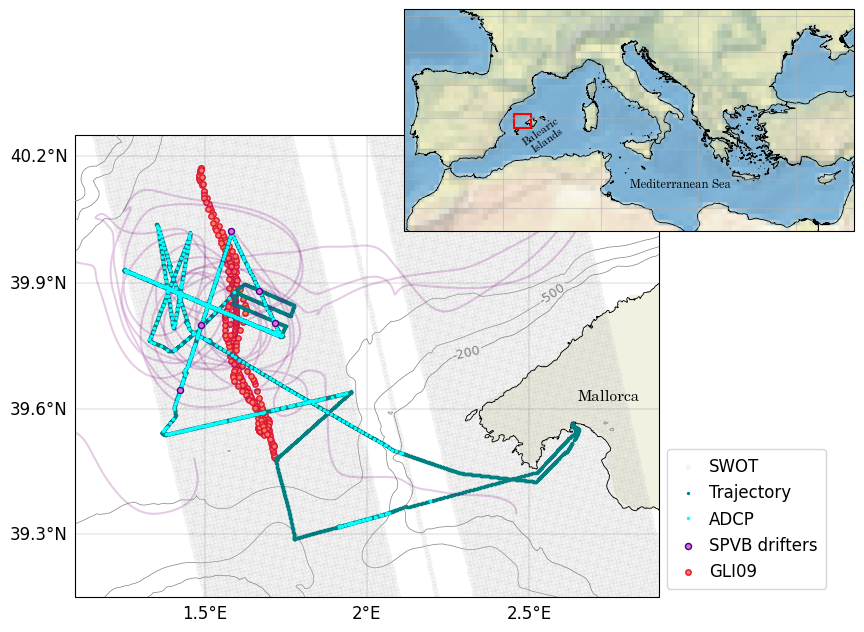

In [37]:
# Create the figure
fig = plt.figure(figsize=(10, 6))

# Define GridSpec
gs = gridspec.GridSpec(1, 1)

# Main plot (cartopy plot)
ax_main = plt.subplot(gs[:, 0], projection=ccrs.Mercator())

# Set extent to the Balearic Sea area
ax_main.set_extent([ll_lon, ur_lon, ll_lat, ur_lat+0.1], crs=ccrs.PlateCarree())

# Plot coastlines and countries
coast = cf.GSHHSFeature(scale='full')
ax_main.add_feature(coast, linewidth=0.6)

# Add land and ocean for better visualization
ax_main.add_feature(cfeature.LAND, facecolor='darkkhaki', alpha=0.2)

# SWATHS
ax_main.scatter(lonsw1, latsw1, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree())
ax_main.scatter(lonsw2, latsw2, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree())
ax_main.scatter(lonnd1, latnd1, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree())
ax_main.scatter(lonnd2, latnd2, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree(), label='SWOT')

# Trajectory ship
ax_main.scatter(ds_GPS_L1_Leg1.LON, ds_GPS_L1_Leg1.LAT, c='teal', label='Trajectory', s=2, zorder=2, transform=ccrs.PlateCarree())
# ax_main.scatter(ds_GPS_L1_Leg2.LON, ds_GPS_L1_Leg2.LAT, c='teal', label='TSG 2', s=2, zorder=2, transform=ccrs.PlateCarree())

# MVP
ax_main.plot(lons_mvp, lats_mvp, 'o', c='cyan', markersize=1.5, zorder=3, transform=ccrs.PlateCarree(), label='ADCP')
# ax_main.plot(lons_mvp2, lats_mvp2, 'o', c='cyan', markersize=1.5, zorder=3, transform=ccrs.PlateCarree(), label='MVP/ADCP 2')

# CTDs
# for nctd in ctds_leg2:
#     ax_main.plot(nctd[1], nctd[0], 'o', c='yellow', markeredgecolor='green', markersize=6, zorder=5, transform=ccrs.PlateCarree())
# ax_main.plot(nctd[1], nctd[0], 'o', c='yellow', markeredgecolor='green', markersize=6, zorder=5, transform=ccrs.PlateCarree(), label='CTD')
# for nctd in ctds_leg1:
#     ax_main.plot(nctd[1], nctd[0], 'o', c='yellow', markeredgecolor='green', markersize=7, zorder=5, transform=ccrs.PlateCarree())

# Drifters
# ax_main.scatter(lon_hereon1, lat_hereon1, c='orchid', edgecolor='indigo', s=14, transform=ccrs.PlateCarree(), zorder=5)
# ax_main.scatter(lon_carthe1, lat_carthe1, c='orchid', edgecolor='indigo', s=14, transform=ccrs.PlateCarree(), zorder=5)
ax_main.scatter(lon_svp, lat_svp, c='orchid', edgecolor='indigo', s=19, transform=ccrs.PlateCarree(), zorder=5, label= 'SPVB drifters')
# ax_main.scatter(lon_at, lat_at, c='orchid', edgecolor='indigo', s=14, transform=ccrs.PlateCarree(), zorder=5)
# ax_main.scatter(lon_carthe2, lat_carthe2, c='orchid', edgecolor='indigo', s=14, transform=ccrs.PlateCarree(), zorder=5)
# ax_main.scatter(lon_hereon2, lat_hereon2, c='orchid', edgecolor='indigo', s=14, transform=ccrs.PlateCarree(), zorder=5)

# for her in her_leg2:
#     ax_main.scatter(her[1], her[0], c='orchid', edgecolor='indigo', s=14, transform=ccrs.PlateCarree(), zorder=5)
# ax_main.scatter(her[1], her[0], c='orchid', edgecolor='indigo', s=14, transform=ccrs.PlateCarree(), label='Drifters', zorder=5)
# for car in car_leg2:
#     ax_main.scatter(car[1], car[0], c='orchid', edgecolor='indigo', s=12, transform=ccrs.PlateCarree(), zorder=5)
# ax_main.scatter(car[1], car[0], c='orchid', edgecolor='indigo', s=12, transform=ccrs.PlateCarree(), zorder=5)

# Drifter trajectories
for ds in ds_svp_leg1:
    ax_main.plot(ds['LON'], ds['LAT'], transform=ccrs.PlateCarree(), alpha=0.2, c='purple')
# for ds in ds_her:
#     ax_main.plot(ds['LON'], ds['LAT'], transform=ccrs.PlateCarree(), alpha=0.2, c='purple')
# for ds in ds_car:
#     ax_main.plot(ds['LON'], ds['LAT'], transform=ccrs.PlateCarree(), alpha=0.2, c='purple')

# Gliders
ax_main.scatter(lon09_raw, lat09_raw, c='coral', s=msize-5, transform=ccrs.PlateCarree(), zorder=1, edgecolors='crimson', label='GLI09')
# ax_main.scatter(lon01, lat01, c='coral', s=msize-6, transform=ccrs.PlateCarree(), zorder=1, label='GLI01')

# Bathymetry
cs1000 = ax_main.contour(lon_topo2d, lat_topo2d, topo_dom, levels=[-1000],#Blues_r, #cmo.haline,
                    colors='gray', linewidths = 0.5, linestyles='-', zorder=0,
                transform=ccrs.PlateCarree())

cs200 = ax_main.contour(lon_topo2d, lat_topo2d, topo_dom, levels=[-200],#Blues_r, #cmo.haline,
                    colors='gray', linewidths = 0.5, linestyles='-', zorder=100,
                transform=ccrs.PlateCarree())

cs500 = ax_main.contour(lon_topo2d, lat_topo2d, topo_dom, levels=[-500],#Blues_r, #cmo.haline,
                    colors='gray', linewidths = 0.5, linestyles='-', zorder=0, transform=ccrs.PlateCarree())

# Add contour labels
plt.clabel(cs1000, inline=2, fontsize=fsize-3, fmt='%1.0f', colors='gray')
plt.clabel(cs500, inline=1, fontsize=fsize-3, fmt='%1.0f', colors='gray')
plt.clabel(cs200, inline=1, fontsize=fsize-3, fmt='%1.0f', colors='gray')

# Grid and ticks
gl = ax_main.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='k', alpha=0.5, linestyle='-', zorder=2)
gl.ylocator = plt.MaxNLocator(4)
gl.xlocator = plt.MaxNLocator(4)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize}
gl.ylabel_style = {'size': fsize}


# add text
ax_main.text(2.65, 39.62, 'Mallorca', fontsize=fsize, color='k', transform=ccrs.PlateCarree(), fontname='suranna')

# Add legend
# put legend outside the plot
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0), fontsize=fsize, ncol=1, columnspacing=0.5, handletextpad=0.5, handlelength=1.5, borderpad=0.5, labelspacing=0.5)
#plt.tight_layout()

######################
# Create a smaller inset axes within the main axes for the subplot
ax_inset = fig.add_axes([0.55, 0.68, 0.45, 0.45],projection=ccrs.Mercator())  # Adjust positions for subplot placement

# set limits
ax_inset.set_extent([-10.1, 36, 30.5, 48], crs=ccrs.PlateCarree())

coast = cf.GSHHSFeature(scale='intermediate')
ax_inset.add_feature(coast, linewidth=0.6)

ax_inset.add_feature(cfeature.LAND, facecolor='darkkhaki')
ax_inset.add_feature(cfeature.OCEAN, facecolor='lightblue')

ax_inset.stock_img()

# Highlight the Balearic Sea area
# rect = plt.Rectangle((ll_lon, ll_lat), ur_lon - ll_lon, ur_lat - ll_lat, edgecolor='red', facecolor='none', linewidth=1.5, transform=ccrs.PlateCarree())
# ax_inset.add_patch(rect)
# plot a star in a position
# ax_inset.scatter(1.9, 39.4, marker='*', edgecolor='red', color='orange', transform=ccrs.PlateCarree())

# INSERT BOX WITH COORDINATES[ll_lon-0.1, ur_lon+0.1, ll_lat, ur_lat+0.1]
ax_inset.plot([ll_lon, ur_lon, ur_lon, ll_lon, ll_lon], [ll_lat, ll_lat, ur_lat+0.1, ur_lat+0.1, ll_lat], 'r', linewidth=1.5, transform=ccrs.PlateCarree())


# Add gridlines
ax_inset.gridlines(draw_labels=False, alpha=0.5)

ax_inset.text(13, 34.3, 'Mediterranean Sea', fontsize=fsize-3, color='k', transform=ccrs.PlateCarree(), fontname='suranna')
ax_inset.text(1.9, 37.8, 'Balearic', rotation = 35, fontsize=fsize-3.5, color='k', transform=ccrs.PlateCarree(), fontname='suranna')
ax_inset.text(2.8, 37.3, 'Islands', rotation = 35, fontsize=fsize-3.5, color='k', transform=ccrs.PlateCarree(), fontname='suranna')

# plt.savefig('sampling_leg1_and_2_FaSt_SWOT_drifters_map.png', dpi=600, bbox_inches='tight')

plt.show()

In [38]:
# import matplotlib.font_manager as fm

# for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(font)


In [39]:
dir_SST  =  '/home/everger/ONEDRIVE/SWOT/imatges/SST/2023/'
file_SST = '20230421000000-GOS-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-MED-v02.0-fv02.0.nc'

In [40]:
dsSST    = xr.open_dataset(dir_SST + file_SST)
time_SST = dsSST['time']
time_SST

<xarray.DataArray 'time' (time: 1)>
array(['2023-04-21T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-04-21
Attributes:
    long_name:      reference time of sst field
    standard_name:  time
    axis:           T
    comment:        Nominal time of Level 4 analysis

In [41]:
lon_SST = dsSST['lon'].values
lat_SST = dsSST['lat'].values

sst = dsSST['adjusted_sea_surface_temperature'][0].values -273.15


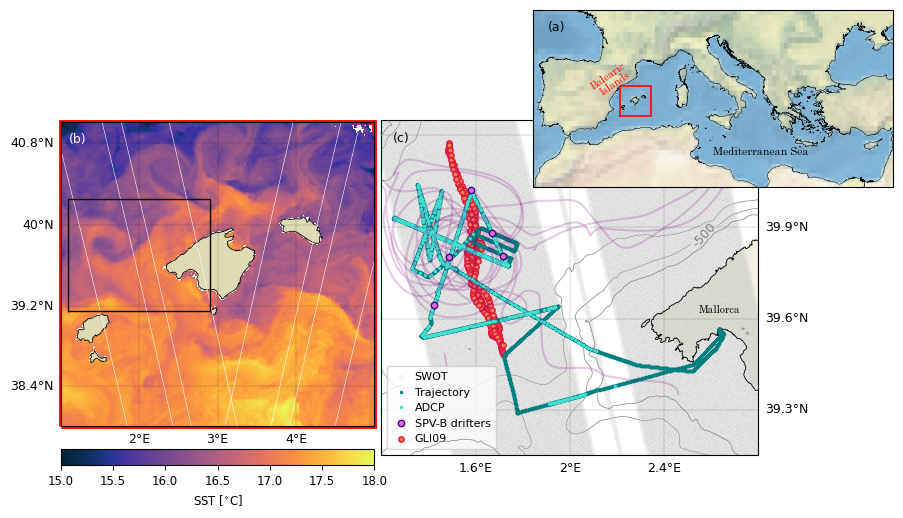

In [51]:
# Create the figure
fig = plt.figure(figsize=(9, 6))

# Define GridSpec
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2], wspace=0.02)  # Left: SST subplot, Right: Main plot

# SST subplot (left)
ax_sst = plt.subplot(gs[0], projection=ccrs.Mercator())
ax_sst.set_extent([1, 5, 38, 41], crs=ccrs.PlateCarree())
ax_sst.add_feature(cfeature.LAND, facecolor='darkkhaki', alpha=0.5)
ax_sst.coastlines(resolution='10m', linewidth=0.6)

# Add SST data (assuming you have SST data to plot)
c_sst = ax_sst.pcolormesh(lon_SST, lat_SST, sst, cmap=cmocean.cm.thermal, vmin=15, vmax=18, transform=ccrs.PlateCarree())
c_sst = plt.colorbar(c_sst, ax=ax_sst, orientation='horizontal', pad=0.05)
# change label size
c_sst.ax.tick_params(labelsize=8.5)
# change size of colorbar title
c_sst.set_label('SST [$^{\circ}$C]', fontsize=8.5) 

#change color borders of the subplot
ax_sst.patch.set_edgecolor('r')
ax_sst.patch.set_linewidth(3.5)  # Adjust the thickness of the border

# Grid and ticks
gl = ax_sst.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='k', alpha=0.5, linestyle='-')
gl.ylocator = plt.MaxNLocator(4)
gl.xlocator = plt.MaxNLocator(4)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9}
gl.ylabel_style = {'size': 9}

ax_sst.plot(swath[:,0], swath[:,1], c='w',transform=ccrs.PlateCarree(),linewidth=0.4)

ax_sst.plot([ll_lon, ur_lon, ur_lon, ll_lon, ll_lon], [ll_lat, ll_lat, ur_lat+0.1, ur_lat+0.1, ll_lat], 'k', linewidth=1, transform=ccrs.PlateCarree())


# Main plot (right - cartopy plot)
ax_main = plt.subplot(gs[1], projection=ccrs.Mercator())
ax_main.set_extent([ll_lon+0.1, ur_lon-0.1, ll_lat, ur_lat+0.1], crs=ccrs.PlateCarree())
coast = cf.GSHHSFeature(scale='full')
ax_main.add_feature(coast, linewidth=0.6)
ax_main.add_feature(cfeature.LAND, facecolor='darkkhaki', alpha=0.2)

# SWATHS
ax_main.scatter(lonsw1, latsw1, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree())
ax_main.scatter(lonsw2, latsw2, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree())
ax_main.scatter(lonnd1, latnd1, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree())
ax_main.scatter(lonnd2, latnd2, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree(), label='SWOT')

# Trajectory ship
ax_main.scatter(ds_GPS_L1_Leg1.LON, ds_GPS_L1_Leg1.LAT, c='teal', label='Trajectory', s=2, zorder=2, transform=ccrs.PlateCarree())
ax_main.plot(lons_mvp, lats_mvp, 'o', c='turquoise', markersize=1.5, transform=ccrs.PlateCarree(), label='ADCP')

# Drifters
ax_main.scatter(lon_svp, lat_svp, c='orchid', edgecolor='indigo', s=21, transform=ccrs.PlateCarree(), zorder=5, label='SPV-B drifters')

# Drifter trajectories
for ds in ds_svp_leg1:
    ax_main.plot(ds['LON'], ds['LAT'], transform=ccrs.PlateCarree(), alpha=0.2, c='purple')

# Gliders
ax_main.scatter(lon09_raw, lat09_raw, c='coral', s=msize-5, transform=ccrs.PlateCarree(), zorder=1, edgecolors='crimson', label='GLI09')
# ax_main.scatter(lon01, lat01, c='coral', s=msize-6, transform=ccrs.PlateCarree(), zorder=1, label='GLI01')

# Bathymetry
cs1000 = ax_main.contour(lon_topo2d, lat_topo2d, topo_dom, levels=[-1000],#Blues_r, #cmo.haline,
                    colors='gray', linewidths = 0.5, linestyles='-', zorder=0,
                transform=ccrs.PlateCarree())

cs200 = ax_main.contour(lon_topo2d, lat_topo2d, topo_dom, levels=[-200],#Blues_r, #cmo.haline,
                    colors='gray', linewidths = 0.5, linestyles='-', zorder=100,
                transform=ccrs.PlateCarree())

cs500 = ax_main.contour(lon_topo2d, lat_topo2d, topo_dom, levels=[-500],#Blues_r, #cmo.haline,
                    colors='gray', linewidths = 0.5, linestyles='-', zorder=0, transform=ccrs.PlateCarree())

# Add contour labels
plt.clabel(cs1000, inline=2, fontsize=fsize-3, fmt='%1.0f', colors='gray')
plt.clabel(cs500, inline=1, fontsize=fsize-3, fmt='%1.0f', colors='gray')
plt.clabel(cs200, inline=1, fontsize=fsize-3, fmt='%1.0f', colors='gray')


# Grid and ticks
gl = ax_main.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='k', alpha=0.5, linestyle='-', zorder=2)
gl.ylocator = plt.MaxNLocator(4)
gl.xlocator = plt.MaxNLocator(4)

gl.top_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9}
gl.ylabel_style = {'size': 9}

# add text
ax_main.text(2.55, 39.62, 'Mallorca', fontsize=8, color='k', transform=ccrs.PlateCarree(), fontname='suranna')


# Add legend
plt.legend(loc='lower left', fontsize=8, ncol=1, columnspacing=0.5, handletextpad=0.5, handlelength=1.5, borderpad=0.5, labelspacing=0.5) #bbox_to_anchor=(1.3, 0),

# Inset map (top right, same place as original)
ax_inset = fig.add_axes([0.65, 0.61, 0.4, 0.4], projection=ccrs.Mercator())
ax_inset.set_extent([-10.1, 36, 30.5, 48], crs=ccrs.PlateCarree())
ax_inset.add_feature(cf.GSHHSFeature(scale='full'), linewidth=0.3)
ax_inset.add_feature(cfeature.LAND, facecolor='darkkhaki')
ax_inset.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax_inset.stock_img()

# Highlight Balearic Sea
# ax_inset.plot([ll_lon, ur_lon, ur_lon, ll_lon, ll_lon], [ll_lat, ll_lat, ur_lat+0.1, ur_lat+0.1, ll_lat], 'r', linewidth=1.5, transform=ccrs.PlateCarree())
ax_inset.plot([1, 5, 5, 1, 1], [38, 38, 41, 41, 38], 'r', linewidth=1.2, transform=ccrs.PlateCarree())

# Add labels
ax_inset.text(13, 34.05, 'Mediterranean Sea', fontsize=8.5, color='k', transform=ccrs.PlateCarree(), fontname='suranna')
ax_inset.text(-2.85, 40.7, 'Balearic', rotation=35, fontsize=8.1, color='r', transform=ccrs.PlateCarree(), fontname='suranna')
ax_inset.text(-1.85, 40.1, 'Islands', rotation=35, fontsize=8.1, color='r', transform=ccrs.PlateCarree(), fontname='suranna')

# put a,b,c
ax_inset.text(-8.2, 46.15, '(a)', fontsize=9, color='k', transform=ccrs.PlateCarree())
ax_sst.text(1.1, 40.8, '(b)', fontsize=9, color='w', transform=ccrs.PlateCarree())
ax_main.text(1.25, 40.18, '(c)',fontsize=9, color='k',transform=ccrs.PlateCarree())

# Save figure
plt.savefig('figure1_new2.png', dpi=600, bbox_inches='tight')

plt.show()